In [1]:
!pip3 install pytesseract



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip3 install opencv-python



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [60]:
import cv2
from matplotlib import pyplot as plt


In [61]:
image_file = "pytesseract/page_01.jpg"
#reading image file
img = cv2.imread(image_file) 

In [62]:
#Actual code 
#cv2.imshow("Original image", img)
#cv2.waitkey(0)

In [63]:
#this function is used to display the image in jupyter notebook since it cannot handle the images
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    figsize = width/float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')

    plt.show()
    

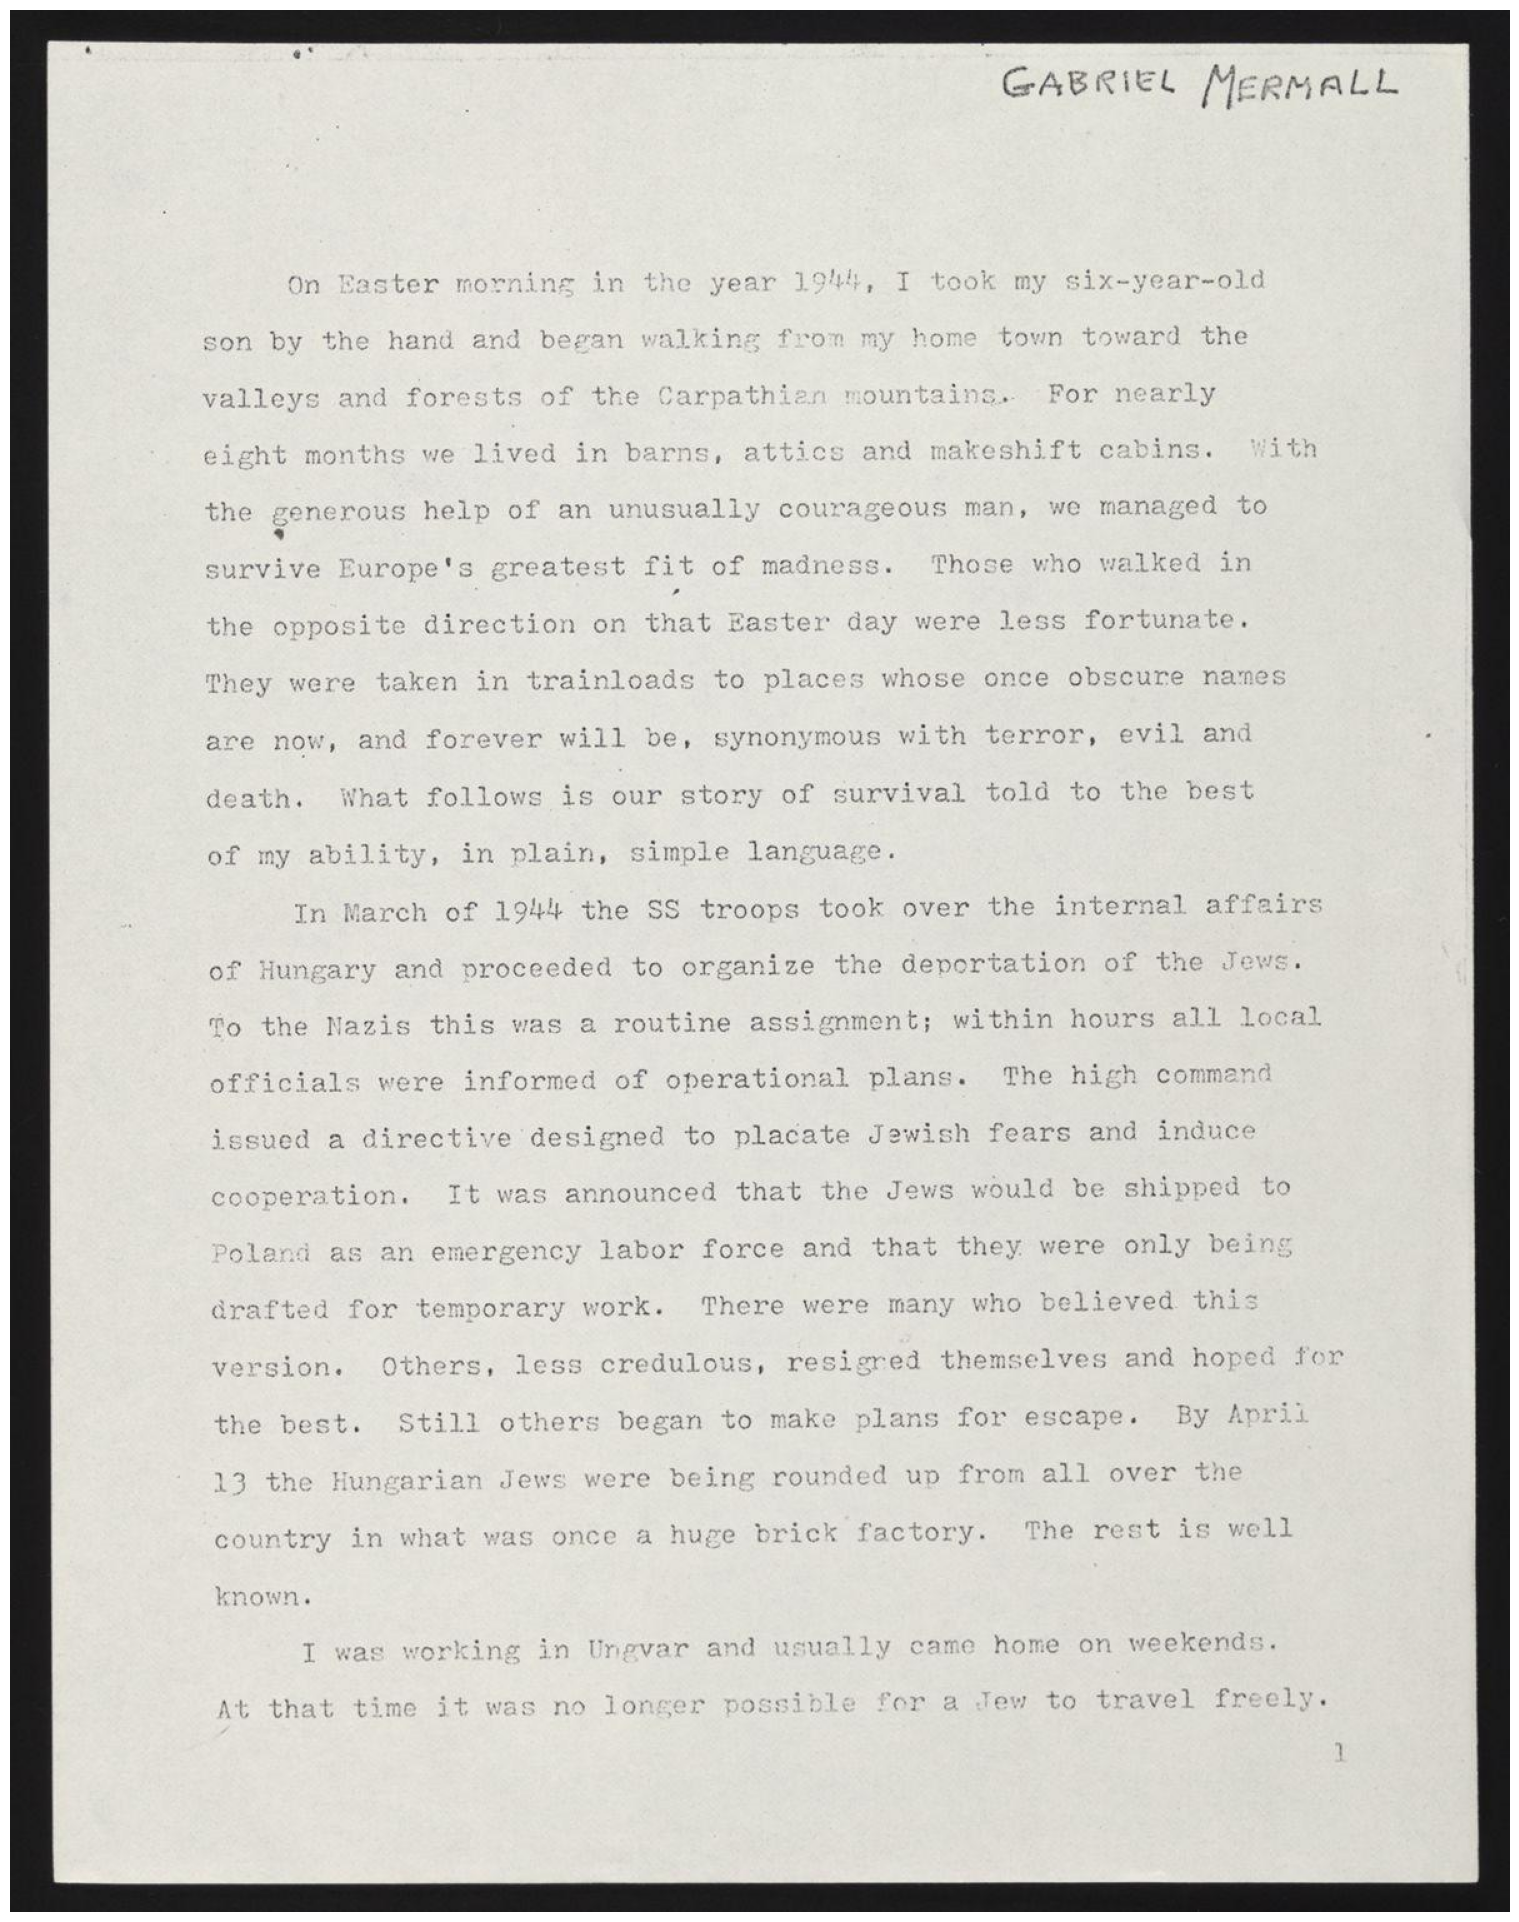

In [64]:
display(image_file)

## Invert images


In [65]:
#reversing the color
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("pytesseract/inverted.jpg", inverted_image)

True

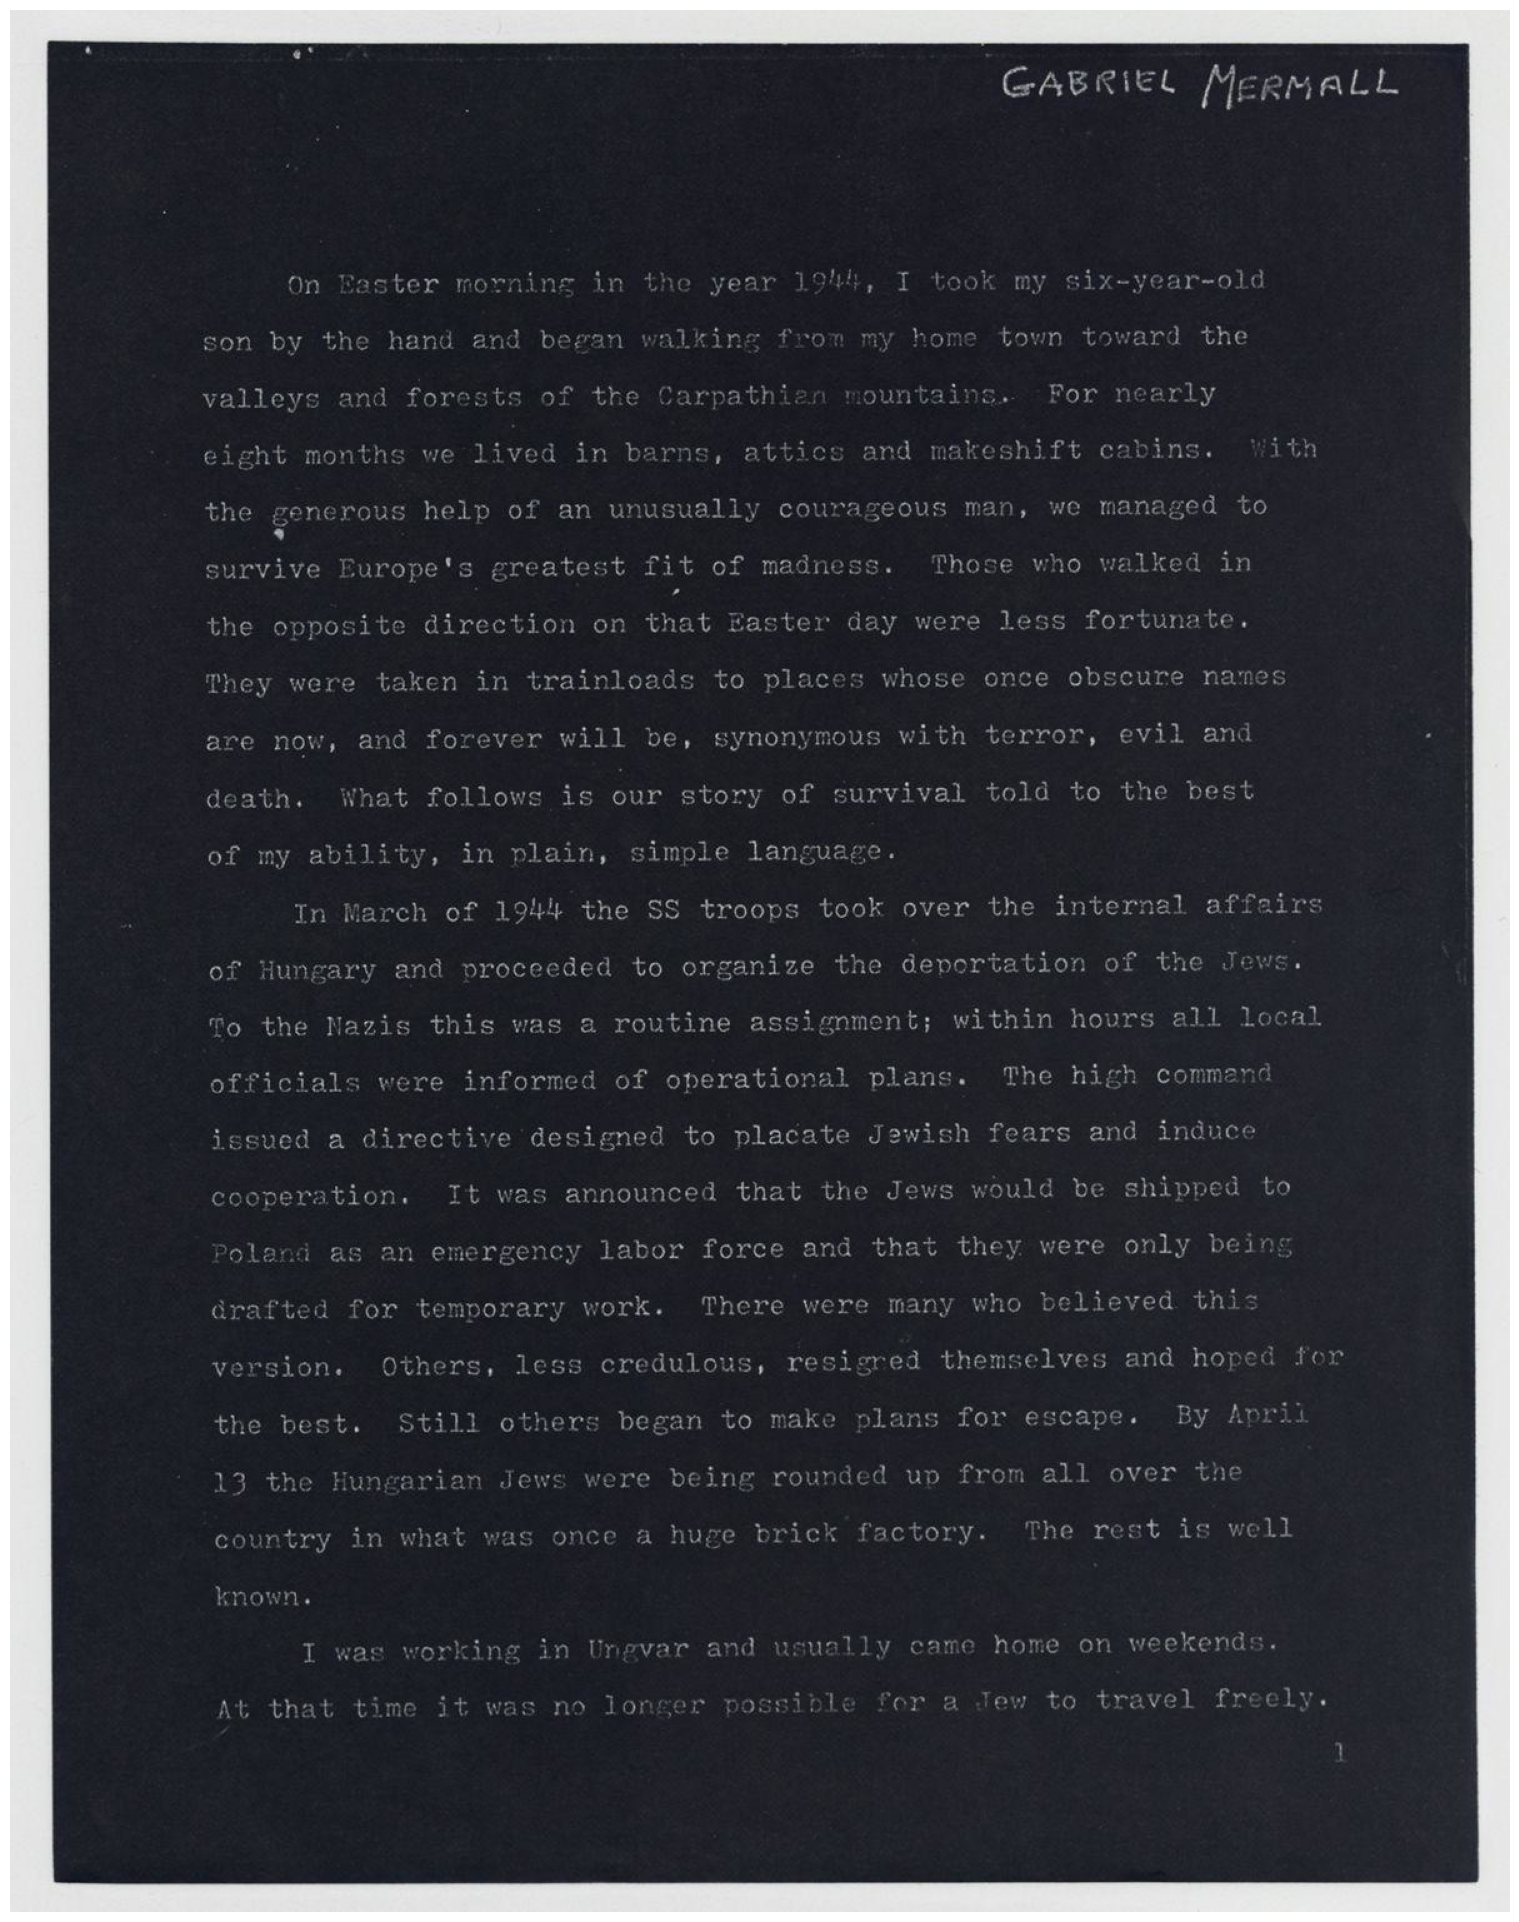

In [66]:
display("pytesseract/inverted.jpg")

## Rescaling

## Binarization

In [67]:
#function for grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [68]:
gray_image = grayscale(img)
cv2.imwrite("pytesseract/gray.jpg", gray_image)

True

In [69]:
#binarization
thresh, im_bw = cv2.threshold(gray_image, 200, 180, cv2.THRESH_BINARY)
cv2.imwrite("pytesseract/bw.jpg",im_bw)

True

## Noise Removal

In [70]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1,),np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)


In [71]:
no_noise = noise_removal(im_bw)
cv2.imwrite("pytesseract/no_noise.jpg", no_noise)

True

## Dilation and Erosion

In [72]:
#adjust font size thinner
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image) #inverting
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return(image)

In [73]:
eroded_image = thin_font(no_noise)
cv2.imwrite("pytesseract/eroded.jpg", eroded_image)

True

In [74]:
#adjust font size thikker
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image) #inverting
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return(image)

In [75]:
dilate_image = thick_font(no_noise)
cv2.imwrite("pytesseract/dialate.jpg",dilate_image)

True

## Rotation/ Deskewing

## Removing Borders

In [80]:
def remove_border(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #sorting borders or boundary
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x,y,w,h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w] #
    return(crop)

In [81]:
no_borders= remove_border(no_noise)
cv2.imwrite("pytesseract/noborder.jpg",no_borders)

True

## Missing Boarders

In [84]:
#white color
color = [255, 255, 255]
top , bottom, left, right = [15]*4


In [85]:
image_with_border = cv2.copyMakeBorder(no_borders,top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("pytesseract/image_with_border.jpg",image_with_border)

True

## Transparency/ Alpha Channel